In [1]:
import tensorflow as tf

## day 1  
简介tensorflow  
tensorflow的两个主要特点：python和data flow graph  
data flow graph由node和edge组成：其中每一个运算操作将作为一个节点（node)，节点与节点之间的连接成为边(edge)，而在计算图的边中流动（flow）的数据被称为张量（tensor）  
node的定义不仅包含加减乘除数学运算，还包含数据的定义与赋值 
node包含的函数需要总结一下
一个完整的tensorflow代码流程是：第一构建数据流图，第二个是像图中喂数据并且运行这个图，第三是更新数据

In [8]:
#构造一个简单的节点图
node1 = tf.constant(3)
node2 = tf.constant(4)
#node3 = tf.add(node1, node2)
node3 = node1+node2
print(node1, node2, node3)

sess = tf.Session()
print(sess.run(node1), sess.run(node2), sess.run(node3))
sess.close()

Tensor("Const_6:0", shape=(), dtype=int32) Tensor("Const_7:0", shape=(), dtype=int32) Tensor("add_6:0", shape=(), dtype=int32)
3 4 7


分析一下上面这个代码好像很简单，node1和node2直接都定义了常量，所以第二步都没有喂数据的操作了  
那么怎么喂数据呢，用到了placeholder函数，这个函数可以不直接赋值，而是只定义一个类型的常量  


In [10]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = tf.add(a,b)
#added_node = a + b

sess = tf.Session()
print(sess.run(adder_node, feed_dict={a:3, b:4}))
print(sess.run(adder_node, feed_dict={a:[3,4], b:[5,6]}))
sess.close()

7.0
[ 8. 10.]


针对于上面这串代码，需要解释的一些事情：  
sess.run后面的feed_dict即为喂数据的过程，用到了字典的数据结构    
这串代码只讲到了第二步，并没有讲到第三步更新的过程，请继续看下面的内容  

### tensor张量的使用：ranks，shapes，types

### 机器学习中的回归问题：Regression
我没有学过机器学习，但是我明白机器学习中的问题可以分成回归问题和分类问题classification  
回归问题是说输入一个x根据某种函数关系输出一个y作为结果，类似于数学中的函数  
分类问题是说输入一个x，输出值y必须是哪个类别中，本节主要讲回归问题  
回归问题还有线性回归linear regression和逻辑回归logistic regression  
线性回归问题是说函数是一个线性函数  
逻辑回归问题可以等同于一个二分类问题binary classification  
关于深度学习的流程这里就不再讲了，遇到的太多了

In [12]:
##这是一个有关于线性回归的例子
#首先定义训练数据
xtrain = [1,2,3]
#xtrain = tf.constant([1,2,3])
ytrain = [1,2,3]
#ytrain = tf.constant([1,2,3])
W = tf.Variable(tf.random_normal([1]), name = 'weights')
b = tf.Variable(tf.random_normal([1]), name = 'bias')
yhat = W * xtrain + b

#定义损失函数
cost = tf.reduce_mean(tf.square(yhat - ytrain))

#定义更新用到的优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)#这不是一个节点
train = optimizer.minimize(cost)#这是一个节点

sess = tf.Session()
sess.run(tf.global_variables_initializer())#如果用到了变量的话，首先要进行初始化
for step in range(0,2001):
    sess.run(train)
    if step % 200 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))
sess.close()

0 13.848175 [-0.55155146] [-0.39593995]
200 0.0031584913 [0.9347267] [0.14838156]
400 0.0012060605 [0.9596651] [0.09169072]
600 0.00046053375 [0.97507554] [0.05665923]
800 0.00017585447 [0.98459816] [0.03501199]
1000 6.7150184e-05 [0.9904827] [0.02163524]
1200 2.5640853e-05 [0.99411887] [0.01336923]
1400 9.791085e-06 [0.9963658] [0.00826138]
1600 3.7388802e-06 [0.9977543] [0.00510503]
1800 1.4277624e-06 [0.99861217] [0.00315476]
2000 5.453351e-07 [0.99914235] [0.00194957]


下面的代码是用到placeholder函数的一个代码，实现的功能是一样的，推荐使用这种格式的代码

In [11]:
X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])
W = tf.Variable(tf.random_normal([1]), name = 'weights')
b = tf.Variable(tf.random_normal([1]), name = 'bias')
yhat = W * X + b

cost = tf.reduce_mean(tf.square(yhat - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)#这不是一个节点
train = optimizer.minimize(cost)#这是一个节点

sess = tf.Session()
sess.run(tf.global_variables_initializer())#如果用到了变量的话，首先要进行初始化
for step in range(0,2001):
    costv, wb, bb, _ = sess.run([cost, W, b, train], feed_dict={X:[1,2,3], Y:[1,2,3]})
    if step % 200 == 0:
        print(step, costv, wb, bb, _)
sess.close()

0 1.9515423 [-0.13793728] [1.4071238] None
200 0.14062706 [0.5655047] [0.9877099] None
400 0.05369823 [0.73150843] [0.6103445] None
600 0.020504592 [0.8340886] [0.3771556] None
800 0.007829673 [0.89747673] [0.23305947] None
1000 0.0029897525 [0.9366469] [0.14401646] None
1200 0.0011416245 [0.9608517] [0.08899333] None
1400 0.00043593245 [0.9758087] [0.05499251] None
1600 0.00016645981 [0.98505133] [0.03398196] None
1800 6.356277e-05 [0.99076253] [0.02099888] None
2000 2.4271401e-05 [0.9942919] [0.01297592] None


线性回归进化成逻辑回归，逻辑回归和二分类算法就是一回事  
区别在于第一加了sigmoid函数  
第二cost function变了  
第三在于分类问题可以计算准确率

In [14]:
#首先准备好训练的数据
xdata = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
ydata = [[0], [0], [0], [1], [1], [1]]

#定义训练数据
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([2, 1]), name = 'weights')
b = tf.Variable(tf.random_normal([1]), name = 'bias')
yhat = tf.sigmoid(tf.matmul(X,W) + b)

#损失函数
cost = -tf.reduce_mean(Y*tf.log(yhat) + (1-Y)*tf.log(1-yhat))

#定义优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)#这不是一个节点
train = optimizer.minimize(cost)#这是一个节点

#准确率计算
predicted = tf.cast(yhat>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

#训练过程
#用with就不用执行sess.close()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        costv, _ = sess.run([cost, train], feed_dict={X:xdata, Y:ydata})
        if step%200 == 0:
            print(step, costv)
            
    #准确率计算
    h, c, a = sess.run([yhat, predicted, accuracy], feed_dict={X:xdata, Y:ydata})
    print("\nHypothesis: ", h, "\npredicted: ", c, "\naccuracy: ", a)

0 3.2937405
200 0.34612426
400 0.33473352
600 0.32434997
800 0.31470126
1000 0.30563888
1200 0.2970738
1400 0.28894818
1600 0.2812211
1800 0.2738612
2000 0.2668428

Hypothesis:  [[0.09280091]
 [0.20391244]
 [0.51900274]
 [0.6943514 ]
 [0.8712237 ]
 [0.9599401 ]] 
predicted:  [[0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]] 
accuracy:  0.8333333


这里还涉及到了txt文件和csv文件处理的过程，暂且先不看了  
向下继续softmax多分类问题  
二分类问题转化成多分类问题的区别有
第一把sigmoid函数转成softmax函数，由此损失函数也会改变  
第二由此，损失函数，精确度计算都会改变  
第三引入了一种新的向量表现形式one-hot向量

In [20]:
#首先准备好训练的数据
xdata = [[1,2,1,1], [2,1,3,2], [3,1,3,4], [4,1,5,5], [1,7,5,5], [1,2,5,6], [1,6,6,6],[1,7,7,7]]
ydata = [[0,0,1], [0,0,1], [0,0,1], [0,1,0], [0,1,0], [0,1,0],[1,0,0],[1,0,0]]

#定义训练数据
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 3])
classnum = 3
W = tf.Variable(tf.random_normal([4, classnum]), name = 'weights')
b = tf.Variable(tf.random_normal([classnum]), name = 'bias')
yhat = tf.nn.softmax(tf.matmul(X,W) + b)

#损失函数
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(yhat), axis=1))

#定义优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)#这不是一个节点
train = optimizer.minimize(cost)#这是一个节点

#准确率计算
#predicted = tf.cast(yhat>0.5, dtype=tf.float32)
#accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

#训练过程
#用with就不用执行sess.close()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        costv, _ = sess.run([cost, train], feed_dict={X:xdata, Y:ydata})
        if step%200 == 0:
            print(step, costv)
            
    #准确率计算
    #h, c, a = sess.run([yhat, predicted, accuracy], feed_dict={X:xdata, Y:ydata})
    #print("\nHypothesis: ", h, "\npredicted: ", c, "\naccuracy: ", a)

0 3.1551704
200 1.0536641
400 0.8915047
600 0.7880783
800 0.7162498
1000 0.6643934
1200 0.6253356
1400 0.5946878
1600 0.56976074
1800 0.5488662
2000 0.53091156


mnist训练集完整代码，用到softmax，这个之后有时间我会做一下

后面是深度神经网络，也是用到了mnist数据集训练一个多分类器，比起之前的变化是网络编程多层的了  
课后作业1：kaggle上titanic的例子：https://github.com/hunkim/KaggleZeroToAll/tree/master/k0-01-titanic
课后作业2：tensor向量操作熟悉需要翻墙：https://docs.google.com/presentation/d/1gQ7Xxrhylkr5Kk5pG15yvX3yOln_hk2-H6jrQeXqKmU/edit#slide=id.g1d46586425_0_44

## day1.5
主要介绍DNN深度神经网络，单层的网络可能不能完成一些问题，这个时候就要用到深层网路发挥作用了  
第一个例子是XOR的例子，单层的神经网络结构不能用，只能用到多层的神经网络 
这个例子暂且不写了，没什么新的东西  
多层神经网络与单层不同，主要是backpropogation上面，用到链式法则chain rule  
第二是讲到了梯度爆炸的问题，解决方法是换激活函数，现在已经很少用到sigmoid函数了，而是用ReLu函数来代替  
第三个讲到了过拟合的问题，判断的标准是训练集的准确度高而测试集的准确度不高，  
解决的办法是三个，更大的数据集/减少特征维数/正则化，  
正则化中包含了一个dropout  
所以代码上面又需要补充一个dropout的语句，再补充一个batch的语句

最后是tensorboard的一个安装和使用步骤，这是我想要的，但是没有讲怎么安转啊

## day2
歇了三天了，重新拾起来看一看  
回顾一下吧
tf分为三步：
第一步：定义常量变量，原始网络，损失函数，如果需要正则化也要进行正则化操作，需要dropout层也要在此定义  
第二步：定义优化器，定义sess会话，初始化变量，运行会话，运行会话的时候可能用到batch操作  
    插播一条，优化器有些什么？ tf.train.GradientDescentOptimizer/tf.train.AdamOptimizer/tf.train.MomentumOptimizer/tf.train.RMSpropOptimizer  
第三步：更新变量，代码上虽然没有体现  
除了这三步以外，还要定义评价函数，等到会话运行的时候一并运行起来  
  
今天要学习的是卷积神经网络  
卷积的原理在这里就不讲了，注意两个术语就行了stride/padding：valid padding + same padding  
卷积后面跟着激活函数  
没了，day3暂且不用学了，day3讲的是rnn  
后面就是实践了，要尽快拿一个网络来好好训练剖析一下  


## day3
实践专场，本来打算直接上手ResNet，但是老师并没有写相关代码，  
先来实践一下mnist数据集  
暂且学习一点基础处理语言

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data

解释一下上面import的包  
前两个包tensorflow和numpy不用说了  
matplotlib是一个专门处理图像的包，和opencv，Image包都可以互相替换  
mnist包是tensorflow专门写的关于这个数据集的处理语言

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
#看不太懂这行代码，不过应该是读取数据集

W0224 19:45:45.170009 140446017124096 deprecation.py:323] From <ipython-input-2-663c3e077182>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0224 19:45:45.172298 140446017124096 deprecation.py:323] From /home/laptop2/lanenet1/venv/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0224 19:45:45.173645 140446017124096 deprecation.py:323] From /home/laptop2/lanenet1/venv/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Extracting MNIST_data/train-images-idx3-ubyte.gz


W0224 19:45:45.475644 140446017124096 deprecation.py:323] From /home/laptop2/lanenet1/venv/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0224 19:45:45.478733 140446017124096 deprecation.py:323] From /home/laptop2/lanenet1/venv/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0224 19:45:45.537153 140446017124096 deprecation.py:323] From /home/laptop2/lanenet1/venv/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.lea

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


(28, 28)


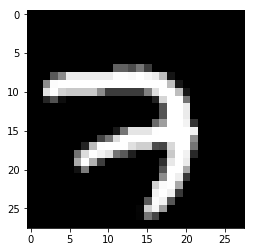

In [3]:
#显示出一张图像，对一张图像的处理，不知道为什么必须要处理一下图片的大小
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')
print(img.shape)

(1, 28, 28, 1)
(1, 14, 14, 5) Tensor("Conv2D:0", shape=(1, 14, 14, 5), dtype=float32)
(1, 14, 14, 5)
(5, 14, 14, 1)
(14, 14, 1)
(14, 14, 1)
(14, 14, 1)
(14, 14, 1)
(14, 14, 1)


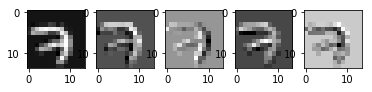

In [4]:
img = img.reshape(-1,28,28,1)
print(img.shape)
W1 = tf.Variable(tf.random_normal([3,3,1,5],stddev=0.01))
#解释一下这行代码，这行是定义卷积核5个3*3*1的卷积核，后面的是标准差0.01
conv2d = tf.nn.conv2d(img, W1, strides = [1,2,2,1], padding = 'SAME')
print(conv2d.shape,conv2d)
#input : 输入要做卷积的图片，要求为一个张量，[ batch, in_height, in_weight, in_channel ]，
#filter：卷积核，要求也是一个张量，[ filter_height, filter_weight, in_channel, out_channels ]，
#strides： 卷积时在图像每一维的步长，[ 1, strides, strides, 1]，第一位和最后一位固定必须是1
#padding： "SAME"是考虑边界，不足的时候用0去填充周围，"VALID"则不考虑
#use_cudnn_on_gpu： bool类型，是否使用cudnn加速，默认为true
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    conv2d_img = conv2d.eval()
    print(conv2d_img.shape)
#eval()这个函数是对conv2d这个张量估值，在tf中，张量的值是打印不出来的，如果要打印就要用到这个函数吧
#为什么开了session之后才能运行这个函数，没开会话之前节点里面是没有填值的，不能运行
    conv2d_img = np.swapaxes(conv2d_img, 0, 3)
    #维度对换操作
    print(conv2d_img.shape)
    for i, one_img in enumerate(conv2d_img):
        print(one_img.shape)
        plt.subplot(1,5,i+1)
        plt.imshow(one_img.reshape(14,14), cmap='gray')

Tensor("MaxPool_1:0", shape=(1, 7, 7, 5), dtype=float32)


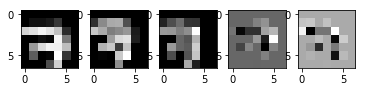

In [6]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME')
print(pool)
#解析池化函数
#value：需要池化的输入，一般接在卷积层后面，通常是feature map，[batch, height, width, channels]
#ksize：池化窗口的大小，取一个四维向量，一般是[1, height, width, 1]
#strides：和卷积类似，窗口在每一个维度上滑动的步长，一般也是[1, stride,stride, 1]
#padding：和卷积类似，可以取'VALID' 或者'SAME'

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    pool_img = pool.eval()
    pool_img = np.swapaxes(pool_img, 0, 3)
    for i, one_img in enumerate(pool_img):
        plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')
        

##
关于真正去运行一个代码，见下一个文件